<a href="https://colab.research.google.com/github/Venkatpotla33/Machine-Learning-Lab/blob/main/ML_Lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Normalization**

# Understanding the Core Concepts
# What is Feature Normalization? 🤔
Think of your dataset's features (columns) as measurements in different units. For example, one feature might be a person's age (e.g., 25-65) and another their income (e.g., 50,000-500,000). The income values are numerically much larger than the age values.

Feature normalization rescales all features to a common range, like 0 to 1 or with a mean of 0 and a standard deviation of 1. This ensures that models which are sensitive to distance don't incorrectly assume that the 'income' feature is more important than the 'age' feature just because its numbers are bigger.

# Why Does it Matter for Different Models?

Distance-Based Models (KNN) & Margin-Based Models (SVM): These models work by calculating distances between data points (KNN) or finding a maximum-margin hyperplane (SVM). If one feature has a much larger scale, it will dominate these calculations. Normalization puts all features on a level playing field, allowing the model to consider them equally. Without it, their performance can degrade significantly.

Tree-Based Models (Decision Tree, Random Forest): These models work by splitting data based on thresholds for individual features (e.g., "is age > 40?"). The absolute scale of the feature doesn't matter, only its ability to split the data. Therefore, tree-based models are largely

robust to the scale of features. The script uses a Decision Tree as a baseline for this reason.


# **Meet the Scalers**
The exercise compares three main scalers from sklearn:

StandardScaler: Centers data to have a mean of 0 and scales it to have a standard deviation of 1. It's a common default but is sensitive to outliers.

MinMaxScaler: Rescales the data to a fixed range, usually [0, 1]. It's straightforward but can be skewed by extreme outliers.

RobustScaler: This scaler is "robust" to outliers. Instead of using the mean and standard deviation, it uses the median and the interquartile range (IQR). Since outliers have little effect on the median and IQR, this method is great for datasets with measurement errors or extreme values.

# **Task 01**

Analyzing Model Sensitivity to Feature Scale Perturbations

In [ ]:
# Step 01
# Import Requried Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score


In [ ]:
# Step 02
# Generate the Data
X, y = make_classification(
    n_samples=5000, n_features=200, n_informative=30, n_redundant=30, n_repeated=10,
    n_classes=3, weights=[0.6, 0.3, 0.1], flip_y=0.02, random_state=42)

display(pd.DataFrame(X).head(10))
display(pd.Series(y).head(10))

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.410322,-5.261859,-1.163766,-0.153684,3.568231,-0.707940,0.489771,-6.343042,0.293913,-1.585606,...,-0.444237,20.788598,-0.723888,-1.194581,-3.389226,-2.306306,0.171226,-0.352550,-10.500982,-14.223370
1,0.259745,-0.474482,0.440823,0.032982,-4.045453,-0.041628,-1.726727,-10.034679,-0.947304,0.003594,...,-1.216021,26.254613,0.516531,0.585288,0.947347,7.108907,-1.066436,-0.100746,2.852750,3.082456
2,-2.552552,-1.428125,-0.419000,-1.719659,-1.221337,0.351569,0.065604,-3.588625,1.505812,-0.465565,...,0.534032,-8.161086,-0.320474,0.111720,-1.636552,-0.857420,-1.458626,0.860103,-2.646138,1.120026
3,0.219870,0.376073,-1.434049,-1.315336,-2.269722,-1.485855,-0.576037,1.880962,-0.898703,1.185118,...,0.637822,8.825904,1.430080,-0.656554,-0.439901,-2.291403,0.130152,1.088626,7.938758,8.087238
4,-0.031715,3.338868,0.175670,-1.271741,-4.966072,0.729516,1.093451,6.680183,0.715479,-0.735871,...,0.987456,-7.970167,-0.010965,-2.662296,-0.395731,3.598462,0.684738,0.654818,-4.095654,-12.675769
5,2.322881,2.068523,-0.989287,-1.906678,-3.312134,-1.500786,0.002074,-11.429341,-2.053206,-0.003001,...,0.369210,-8.264877,-1.106566,0.625011,2.757359,8.538901,-1.349422,0.128069,-16.110255,-2.728695
6,0.596823,0.389166,-0.390060,0.370387,-0.813622,1.087261,-0.180157,3.144370,0.559689,1.252073,...,0.265332,-18.388850,1.628659,-0.432133,-1.068751,3.968284,-1.343721,0.521215,3.518927,5.877838
7,0.169397,0.983215,1.155419,2.235295,-1.582416,0.897878,1.941910,21.252081,0.034573,-0.549984,...,0.692986,11.796659,-0.875684,-2.578245,-0.217594,-4.560822,-1.152087,1.338007,3.302076,9.304122
8,0.078887,0.250754,-0.224294,1.246657,-3.783130,0.611339,0.299169,-1.728313,-0.216013,-1.267685,...,0.256684,3.864543,1.095427,1.710725,5.709107,-0.910313,-0.458185,-0.882291,-6.291401,-5.466829
9,0.372607,-6.142662,-0.575440,-0.668233,0.835064,0.731911,-0.822526,-12.014731,-0.409534,-0.790790,...,0.195291,9.886237,-0.542919,2.131069,5.852987,8.605014,0.856228,-0.377141,-8.114497,0.265380


,0
0,1
1,2
2,2
3,2
4,0
5,0
6,1
7,1
8,1
9,0


In [ ]:
# Inject heterogeneous scales and outliers

X[:, 0:50] *= 0.1
X[:, 50:100] *= 10
X[:, 100:150] *= 100
rng = np.random.RandomState(42)
outlier_cols = slice(150, 170)
X[:, outlier_cols] += rng.standard_t(df=2, size=X[:, outlier_cols].shape) * 20

display(pd.DataFrame(X).head(5))

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.041032,-0.526186,-0.116377,-0.015368,0.356823,-0.070794,0.048977,-0.634304,0.029391,-0.158561,...,-0.444237,20.788598,-0.723888,-1.194581,-3.389226,-2.306306,0.171226,-0.352550,-10.500982,-14.223370
1,0.025974,-0.047448,0.044082,0.003298,-0.404545,-0.004163,-0.172673,-1.003468,-0.094730,0.000359,...,-1.216021,26.254613,0.516531,0.585288,0.947347,7.108907,-1.066436,-0.100746,2.852750,3.082456
2,-0.255255,-0.142813,-0.041900,-0.171966,-0.122134,0.035157,0.006560,-0.358862,0.150581,-0.046556,...,0.534032,-8.161086,-0.320474,0.111720,-1.636552,-0.857420,-1.458626,0.860103,-2.646138,1.120026
3,0.021987,0.037607,-0.143405,-0.131534,-0.226972,-0.148586,-0.057604,0.188096,-0.089870,0.118512,...,0.637822,8.825904,1.430080,-0.656554,-0.439901,-2.291403,0.130152,1.088626,7.938758,8.087238
4,-0.003172,0.333887,0.017567,-0.127174,-0.496607,0.072952,0.109345,0.668018,0.071548,-0.073587,...,0.987456,-7.970167,-0.010965,-2.662296,-0.395731,3.598462,0.684738,0.654818,-4.095654,-12.675769


In [ ]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

display(pd.DataFrame(X_train).head(5))
display(pd.DataFrame(X_test).head(5))
display(pd.Series(y_train).head(5))
display(pd.Series(y_test).head(5))

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.120804,0.030167,0.063469,-0.094109,-0.136102,0.234436,-0.015875,-1.496096,0.020987,0.018295,...,0.909063,-14.213749,-0.431701,-2.252419,-7.148032,2.953692,1.063426,-0.842725,-3.590572,-0.575767
1,0.025653,0.026649,-0.053379,-0.128921,-0.334820,-0.065492,-0.076998,0.638117,0.004538,-0.124022,...,0.963305,-4.445486,-0.450063,-0.966457,2.825118,-1.334743,-0.066101,2.337802,19.707713,8.979609
2,0.105171,-0.011333,-0.166378,-0.029226,-0.361747,-0.141120,-0.010463,0.308673,0.004233,-0.030654,...,-1.092530,-12.366560,1.711598,-2.430303,-1.901142,16.142057,-0.824726,0.548230,8.395537,1.142334
3,-0.054427,-0.380156,-0.110732,-0.088277,0.522387,0.023826,0.049245,-1.069341,0.005682,-0.111483,...,0.820753,-3.162329,-1.476007,1.954193,-4.728014,-1.764757,-0.814789,1.142445,-1.192094,-0.471488
4,-0.022827,-0.219921,0.058498,0.220996,-0.037061,-0.118305,0.045623,-1.797708,0.134773,0.010198,...,1.400367,0.536124,0.393326,0.601535,2.314389,-6.036318,0.312743,0.778025,7.094020,8.084027


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.053893,0.201688,-0.013101,-0.090040,0.131550,-0.012342,-0.011789,0.136121,0.069503,0.042960,...,0.263115,-6.749474,0.417733,4.355899,-2.757173,-11.165674,0.407182,0.929675,-13.815409,0.955500
1,-0.102677,0.278387,-0.063380,-0.245145,0.129565,0.075473,-0.004494,-0.268591,-0.079784,0.001163,...,0.308616,17.810520,0.272502,2.573588,-0.862598,6.472723,-1.647089,0.017065,8.150584,5.095860
2,0.071768,0.000470,0.104675,0.127041,-0.646096,0.145600,-0.019757,0.918501,0.107808,-0.144891,...,-1.715733,-0.112661,2.028759,1.190353,5.122668,-3.550779,0.161133,-1.284883,2.702567,-4.421721
3,0.190718,-0.500961,0.032411,0.150190,-0.079402,0.171528,-0.132279,-2.006449,-0.002576,0.035943,...,1.633999,-0.394870,0.489120,-0.098099,1.665976,19.554674,0.403166,1.828205,1.790858,-3.109348
4,0.044962,-0.235186,-0.105675,0.039843,0.129656,0.001823,0.079155,-1.092827,-0.025118,-0.002204,...,-1.009049,5.628342,-0.834995,3.831031,3.168319,4.519816,0.622834,1.427528,9.917057,0.979233


,0
0,0
1,0
2,0
3,0
4,1


,0
0,2
1,1
2,0
3,0
4,0


In [ ]:
# Step 03
# Define scalers and models

scalers = {
    "None": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}
models = {
    "KNN(k=11)": KNeighborsClassifier(n_neighbors=11),
    "SVM(RBF)": SVC(kernel='rbf', C=10, gamma='scale'),
    "LogisticRegression": LogisticRegression(max_iter=3000, multi_class='multinomial'),
    "DecisionTree": DecisionTreeClassifier(max_depth=None, random_state=42)
}

# Define evaluation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = {'acc': make_scorer(accuracy_score), 'f1': make_scorer(f1_score, average='macro')}

# pipeline and run cross-validation Function
def evaluate_combo(scaler_name, scaler, model_name, model):
    steps = []
    if scaler is not None:
        steps.append(('scaler', scaler))
    steps.append(('model', model))
    pipe = Pipeline(steps)
    cvres = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    return {
        'Scaler': scaler_name,
        'Model': model_name,
        'CV_Acc_Mean': np.mean(cvres['test_acc']),
        'CV_F1_Mean': np.mean(cvres['test_f1'])
    }


results = []
for s_name, scaler in scalers.items():
    for m_name, model in models.items():
        results.append(evaluate_combo(s_name, scaler, m_name, model))

results_sorted = sorted(results, key=lambda d: d['CV_F1_Mean'], reverse=True)
print("--- Results from Original Script ---")
for r in results_sorted:
    print(f"Scaler: {r['Scaler']:<15} | Model: {r['Model']:<20} | F1: {r['CV_F1_Mean']:.4f} | Acc: {r['CV_Acc_Mean']:.4f}")



--- Results from Original Script ---
Scaler: MinMaxScaler    | Model: SVM(RBF)             | F1: 0.7562 | Acc: 0.8440
Scaler: StandardScaler  | Model: SVM(RBF)             | F1: 0.7424 | Acc: 0.8395
Scaler: RobustScaler    | Model: SVM(RBF)             | F1: 0.7085 | Acc: 0.8090
Scaler: None            | Model: SVM(RBF)             | F1: 0.6951 | Acc: 0.7835
Scaler: None            | Model: LogisticRegression   | F1: 0.6298 | Acc: 0.7385
Scaler: StandardScaler  | Model: LogisticRegression   | F1: 0.6167 | Acc: 0.7312
Scaler: RobustScaler    | Model: LogisticRegression   | F1: 0.6154 | Acc: 0.7305
Scaler: MinMaxScaler    | Model: LogisticRegression   | F1: 0.6112 | Acc: 0.7390
Scaler: StandardScaler  | Model: KNN(k=11)            | F1: 0.5423 | Acc: 0.7392
Scaler: MinMaxScaler    | Model: KNN(k=11)            | F1: 0.5342 | Acc: 0.7412
Scaler: None            | Model: DecisionTree         | F1: 0.5286 | Acc: 0.6420
Scaler: StandardScaler  | Model: DecisionTree         | F1: 0.5286 | Acc

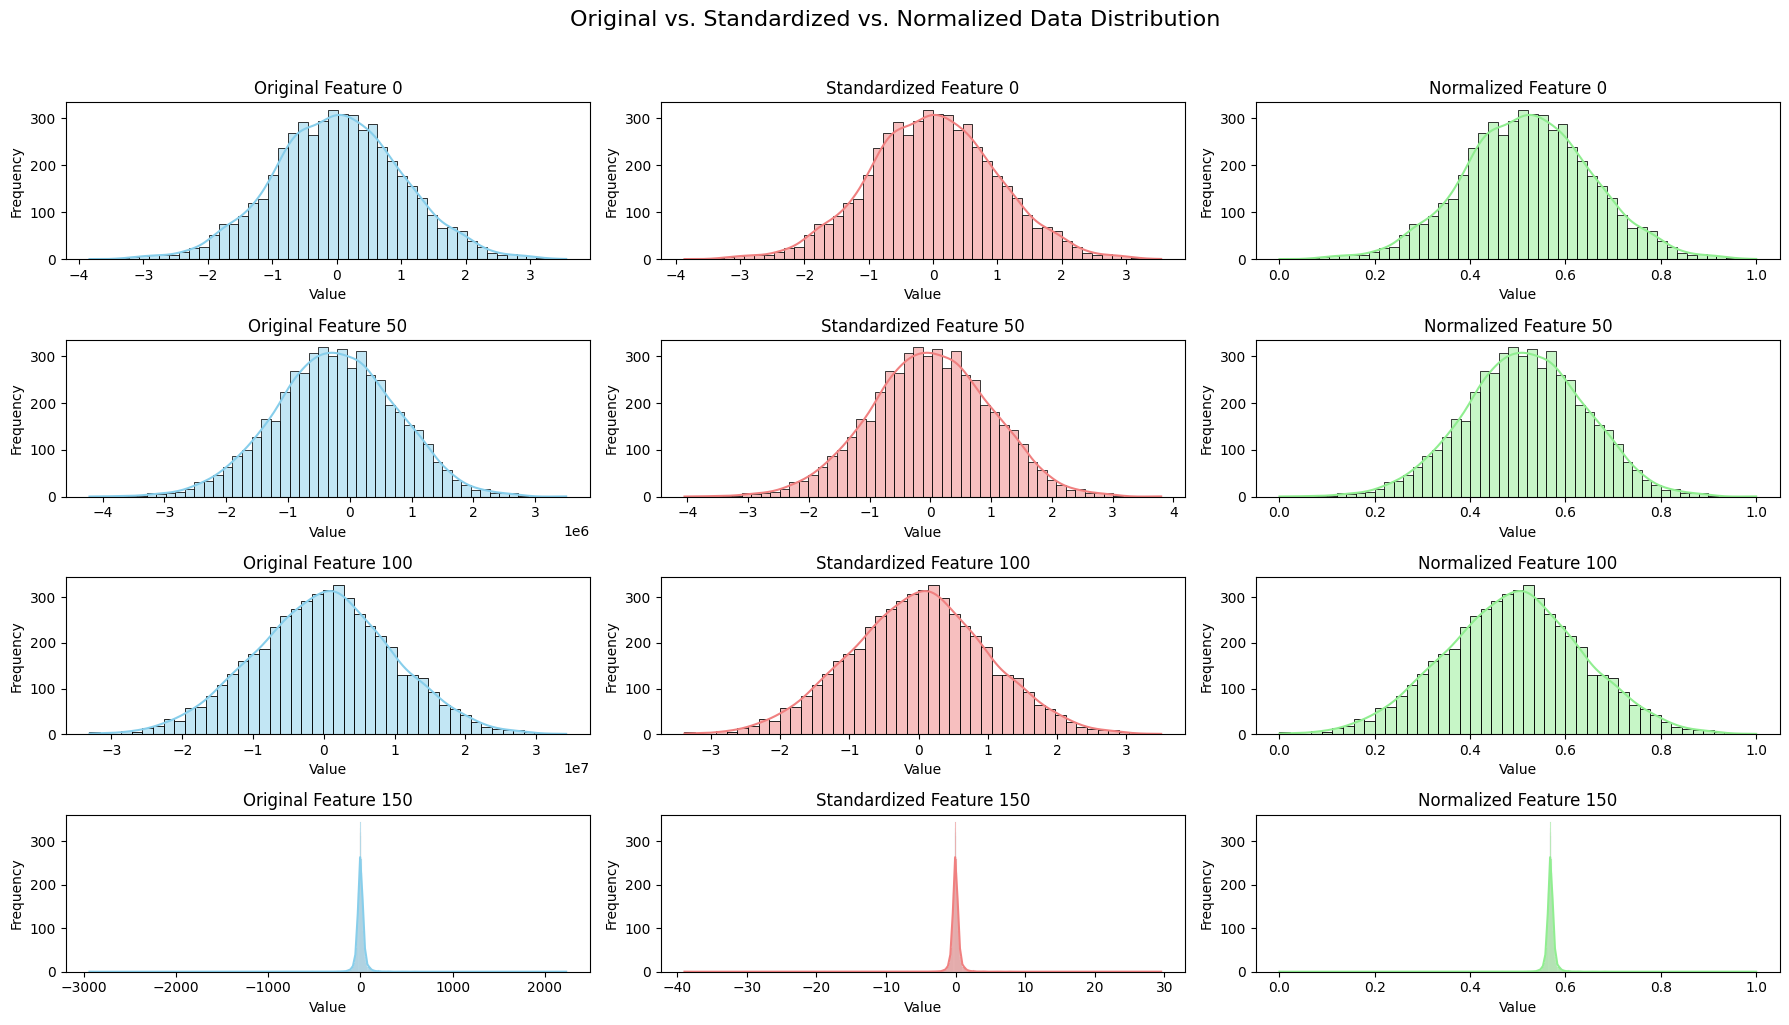

In [ ]:
# Ploting Graph between standardization and Normalization

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 02: Generate the Data (re-generating to ensure consistent base data)
X, y = make_classification(
    n_samples=5000, n_features=200, n_informative=30, n_redundant=30, n_repeated=10,
    n_classes=3, weights=[0.6, 0.3, 0.1], flip_y=0.02, random_state=42)

# Inject heterogeneous scales and outliers based on the user's requested pattern
# Applying different multipliers to ranges 10:50, 20:50, 20:100, 30:100, up to 100:150
multipliers = [0.1, 10, 100, 1000] # Example multipliers, adjust as needed
start_ranges = [10, 20, 20, 30, 40, 50, 60, 70, 80, 90, 100]
end_ranges = [50, 50, 100, 100, 110, 110, 120, 120, 130, 130, 150]

for i in range(len(start_ranges)):
    start = start_ranges[i]
    end = end_ranges[i]
    # Cycle through multipliers or use a more specific pattern if desired
    multiplier = multipliers[i % len(multipliers)]
    X[:, start:end] *= multiplier

# Adding outliers
rng = np.random.RandomState(42)
outlier_cols = slice(150, 170)
X[:, outlier_cols] += rng.standard_t(df=2, size=X[:, outlier_cols].shape) * 20


# Select a few features for visualization
features_to_plot = [0, 50, 100, 150]

# Apply StandardScaler
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)

# Apply MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)

# Create subplots
fig, axes = plt.subplots(len(features_to_plot), 3, figsize=(18, 10))
fig.suptitle('Original vs. Standardized vs. Normalized Data Distribution', y=1.02, fontsize=16)

for i, feature_index in enumerate(features_to_plot):
    # Plot original data
    sns.histplot(X[:, feature_index], ax=axes[i, 0], kde=True, color='skyblue')
    axes[i, 0].set_title(f'Original Feature {feature_index}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Plot Standardized data
    sns.histplot(X_standard_scaled[:, feature_index], ax=axes[i, 1], kde=True, color='lightcoral')
    axes[i, 1].set_title(f'Standardized Feature {feature_index}')
    axes[i, 1].set_xlabel('Value')
    axes[i, 1].set_ylabel('Frequency')

    # Plot Normalized data
    sns.histplot(X_minmax_scaled[:, feature_index], ax=axes[i, 2], kde=True, color='lightgreen')
    axes[i, 2].set_title(f'Normalized Feature {feature_index}')
    axes[i, 2].set_xlabel('Value')
    axes[i, 2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

Modify Script with New Perturbations

In [ ]:
X, y = make_classification(
    n_samples=5000, n_features=200, n_informative=30, n_redundant=30, n_repeated=10,
    n_classes=3, weights=[0.6, 0.3, 0.1], flip_y=0.02, random_state=42)

display(pd.DataFrame(X).head(10))
display(pd.Series(y).head(10))

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.410322,-5.261859,-1.163766,-0.153684,3.568231,-0.707940,0.489771,-6.343042,0.293913,-1.585606,...,-0.444237,20.788598,-0.723888,-1.194581,-3.389226,-2.306306,0.171226,-0.352550,-10.500982,-14.223370
1,0.259745,-0.474482,0.440823,0.032982,-4.045453,-0.041628,-1.726727,-10.034679,-0.947304,0.003594,...,-1.216021,26.254613,0.516531,0.585288,0.947347,7.108907,-1.066436,-0.100746,2.852750,3.082456
2,-2.552552,-1.428125,-0.419000,-1.719659,-1.221337,0.351569,0.065604,-3.588625,1.505812,-0.465565,...,0.534032,-8.161086,-0.320474,0.111720,-1.636552,-0.857420,-1.458626,0.860103,-2.646138,1.120026
3,0.219870,0.376073,-1.434049,-1.315336,-2.269722,-1.485855,-0.576037,1.880962,-0.898703,1.185118,...,0.637822,8.825904,1.430080,-0.656554,-0.439901,-2.291403,0.130152,1.088626,7.938758,8.087238
4,-0.031715,3.338868,0.175670,-1.271741,-4.966072,0.729516,1.093451,6.680183,0.715479,-0.735871,...,0.987456,-7.970167,-0.010965,-2.662296,-0.395731,3.598462,0.684738,0.654818,-4.095654,-12.675769
5,2.322881,2.068523,-0.989287,-1.906678,-3.312134,-1.500786,0.002074,-11.429341,-2.053206,-0.003001,...,0.369210,-8.264877,-1.106566,0.625011,2.757359,8.538901,-1.349422,0.128069,-16.110255,-2.728695
6,0.596823,0.389166,-0.390060,0.370387,-0.813622,1.087261,-0.180157,3.144370,0.559689,1.252073,...,0.265332,-18.388850,1.628659,-0.432133,-1.068751,3.968284,-1.343721,0.521215,3.518927,5.877838
7,0.169397,0.983215,1.155419,2.235295,-1.582416,0.897878,1.941910,21.252081,0.034573,-0.549984,...,0.692986,11.796659,-0.875684,-2.578245,-0.217594,-4.560822,-1.152087,1.338007,3.302076,9.304122
8,0.078887,0.250754,-0.224294,1.246657,-3.783130,0.611339,0.299169,-1.728313,-0.216013,-1.267685,...,0.256684,3.864543,1.095427,1.710725,5.709107,-0.910313,-0.458185,-0.882291,-6.291401,-5.466829
9,0.372607,-6.142662,-0.575440,-0.668233,0.835064,0.731911,-0.822526,-12.014731,-0.409534,-0.790790,...,0.195291,9.886237,-0.542919,2.131069,5.852987,8.605014,0.856228,-0.377141,-8.114497,0.265380


,0
0,1
1,2
2,2
3,2
4,0
5,0
6,1
7,1
8,1
9,0


In [ ]:
# Inject heterogeneous scales based on the user's requested pattern
# Applying different multipliers to ranges 10:50, 20:50, 20:100, 30:100, up to 100:150

# First, reset X to its original state before applying new perturbations
X, y = make_classification(
    n_samples=5000, n_features=200, n_informative=30, n_redundant=30, n_repeated=10,
    n_classes=3, weights=[0.6, 0.3, 0.1], flip_y=0.02, random_state=42)

# Apply perturbations based on user's requested pattern
multipliers = [0.1, 10, 100, 1000] # Example multipliers, adjust as needed
start_ranges = [10, 20, 20, 30, 40, 50, 60, 70, 80, 90, 100]
end_ranges = [50, 50, 100, 100, 110, 110, 120, 120, 130, 130, 150]

for i in range(len(start_ranges)):
    start = start_ranges[i]
    end = end_ranges[i]
    # Cycle through multipliers or use a more specific pattern if desired
    multiplier = multipliers[i % len(multipliers)]
    X[:, start:end] *= multiplier

# Adding outliers
rng = np.random.RandomState(42)
outlier_cols = slice(150, 170)
X[:, outlier_cols] += rng.standard_t(df=2, size=X[:, outlier_cols].shape) * 20

display(pd.DataFrame(X).head())

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-0.410322,-5.261859,-1.163766,-0.153684,3.568231,-0.707940,0.489771,-6.343042,0.293913,-1.585606,...,-0.444237,20.788598,-0.723888,-1.194581,-3.389226,-2.306306,0.171226,-0.352550,-10.500982,-14.223370
1,0.259745,-0.474482,0.440823,0.032982,-4.045453,-0.041628,-1.726727,-10.034679,-0.947304,0.003594,...,-1.216021,26.254613,0.516531,0.585288,0.947347,7.108907,-1.066436,-0.100746,2.852750,3.082456
2,-2.552552,-1.428125,-0.419000,-1.719659,-1.221337,0.351569,0.065604,-3.588625,1.505812,-0.465565,...,0.534032,-8.161086,-0.320474,0.111720,-1.636552,-0.857420,-1.458626,0.860103,-2.646138,1.120026
3,0.219870,0.376073,-1.434049,-1.315336,-2.269722,-1.485855,-0.576037,1.880962,-0.898703,1.185118,...,0.637822,8.825904,1.430080,-0.656554,-0.439901,-2.291403,0.130152,1.088626,7.938758,8.087238
4,-0.031715,3.338868,0.175670,-1.271741,-4.966072,0.729516,1.093451,6.680183,0.715479,-0.735871,...,0.987456,-7.970167,-0.010965,-2.662296,-0.395731,3.598462,0.684738,0.654818,-4.095654,-12.675769


In [ ]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [ ]:
# Step 03
# Define scalers and models

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate # Import StratifiedKFold and cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline # Import Pipeline
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.svm import SVC # Import SVC
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score # Import make_scorer, accuracy_score, f1_score


scalers = {
    "None": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}
models = {
    "KNN(k=11)": KNeighborsClassifier(n_neighbors=11),
    "SVM(RBF)": SVC(kernel='rbf', C=10, gamma='scale'),
    "LogisticRegression": LogisticRegression(max_iter=3000, multi_class='multinomial'),
    "DecisionTree": DecisionTreeClassifier(max_depth=None, random_state=42)
}

# Define evaluation procedure
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = {'acc': make_scorer(accuracy_score), 'f1': make_scorer(f1_score, average='macro')}

# pipeline and run cross-validation Function
def evaluate_combo(scaler_name, scaler, model_name, model):
    steps = []
    if scaler is not None:
        steps.append(('scaler', scaler))
    steps.append(('model', model))
    pipe = Pipeline(steps)
    cvres = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    return {
        'Scaler': scaler_name,
        'Model': model_name,
        'CV_Acc_Mean': np.mean(cvres['test_acc']) * 100,
        'CV_F1_Mean': np.mean(cvres['test_f1']) * 100
    }


results = []
for s_name, scaler in scalers.items():
    for m_name, model in models.items():
        results.append(evaluate_combo(s_name, scaler, m_name, model))

results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='CV_F1_Mean', ascending=False)

print("--- Results from Original Script ---")
display(results_df_sorted)

--- Results from Original Script ---


,Scaler,Model,CV_Acc_Mean,CV_F1_Mean
9,MinMaxScaler,SVM(RBF),84.400,75.622106
5,StandardScaler,SVM(RBF),83.950,74.236889
13,RobustScaler,SVM(RBF),80.900,70.854993
6,StandardScaler,LogisticRegression,73.125,61.669611
14,RobustScaler,LogisticRegression,73.050,61.535374
10,MinMaxScaler,LogisticRegression,73.850,61.119236
2,None,LogisticRegression,67.550,57.296246
1,None,SVM(RBF),70.675,56.667052
4,StandardScaler,KNN(k=11),73.925,54.227174
8,MinMaxScaler,KNN(k=11),74.125,53.424969


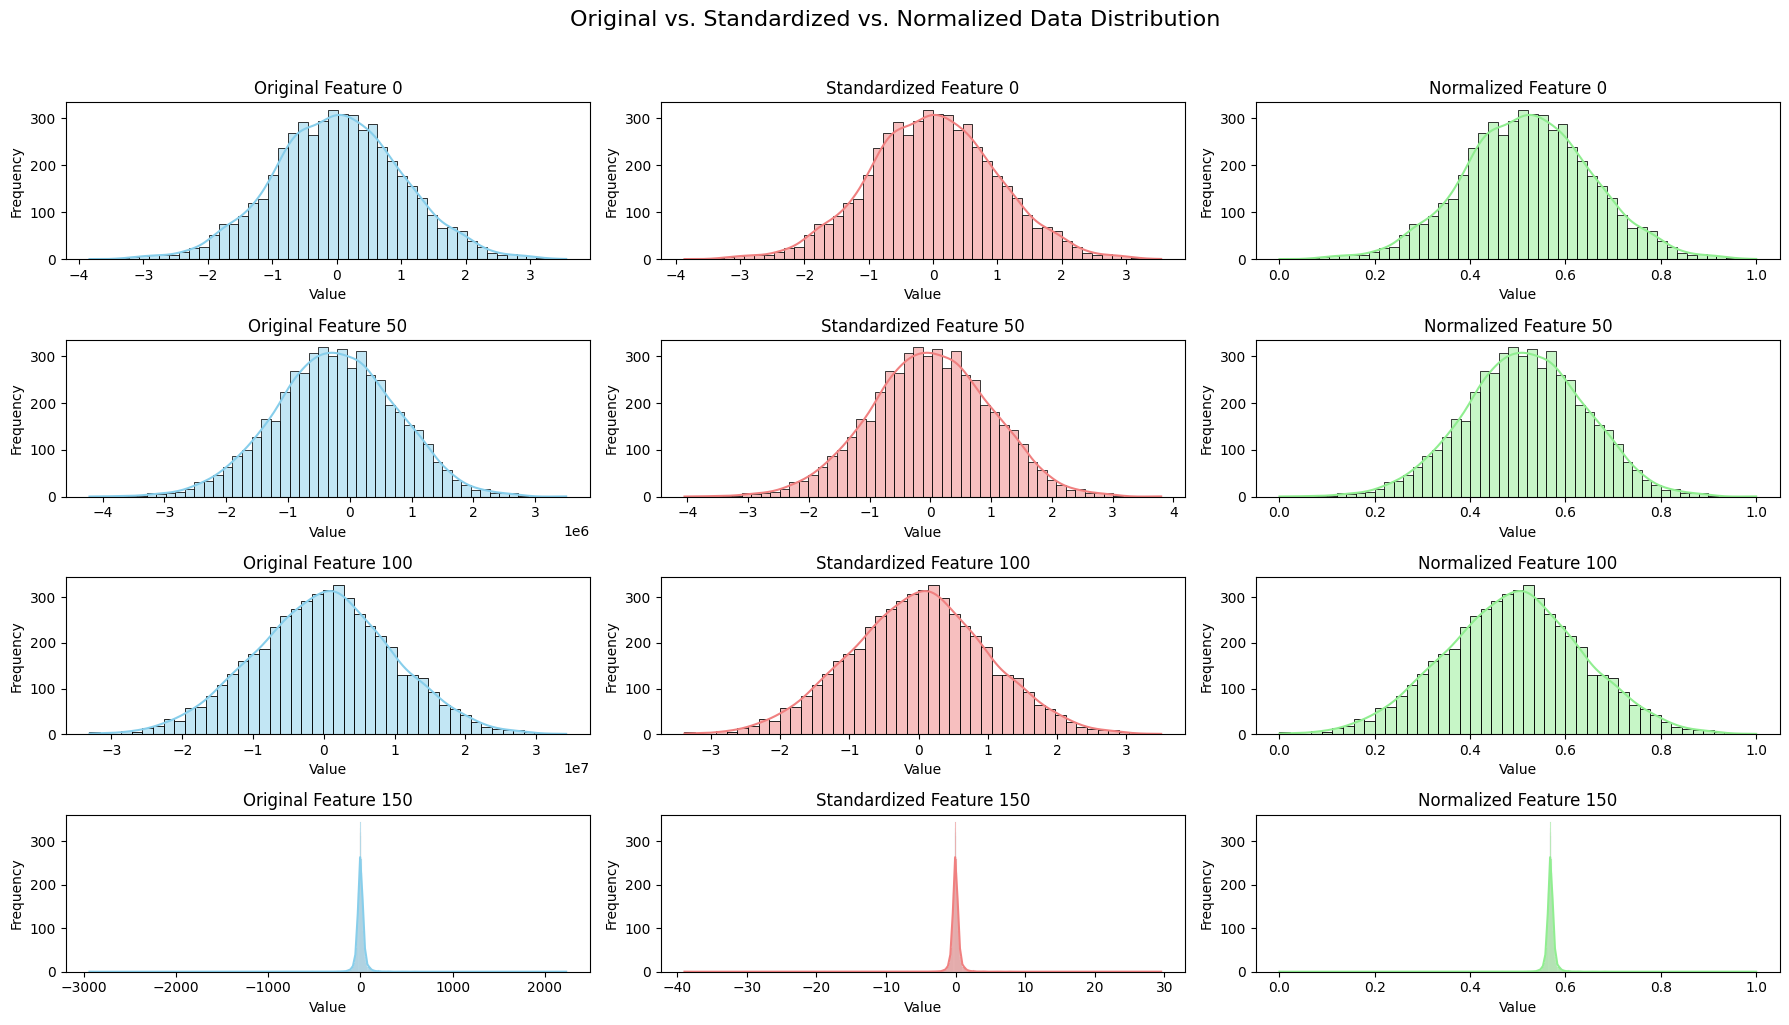

In [ ]:
# Ploting Graph between standardization and Normalization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Step 02: Generate the Data
X, y = make_classification(
    n_samples=5000, n_features=200, n_informative=30, n_redundant=30, n_repeated=10,
    n_classes=3, weights=[0.6, 0.3, 0.1], flip_y=0.02, random_state=42)

# Inject heterogeneous scales and outliers based on the user's requested pattern
# Applying different multipliers to ranges 10:50, 20:50, 20:100, 30:100, up to 100:150
multipliers = [0.1, 10, 100, 1000] # Example multipliers, adjust as needed
start_ranges = [10, 20, 20, 30, 40, 50, 60, 70, 80, 90, 100]
end_ranges = [50, 50, 100, 100, 110, 110, 120, 120, 130, 130, 150]

for i in range(len(start_ranges)):
    start = start_ranges[i]
    end = end_ranges[i]
    # Cycle through multipliers or use a more specific pattern if desired
    multiplier = multipliers[i % len(multipliers)]
    X[:, start:end] *= multiplier

# Adding outliers
rng = np.random.RandomState(42)
outlier_cols = slice(150, 170)
X[:, outlier_cols] += rng.standard_t(df=2, size=X[:, outlier_cols].shape) * 20


# Select a few features for visualization
features_to_plot = [0, 50, 100, 150]

# Apply StandardScaler
scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X)

# Apply MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)

# Create subplots
fig, axes = plt.subplots(len(features_to_plot), 3, figsize=(18, 10))
fig.suptitle('Original vs. Standardized vs. Normalized Data Distribution', y=1.02, fontsize=16)

for i, feature_index in enumerate(features_to_plot):
    # Plot original data
    sns.histplot(X[:, feature_index], ax=axes[i, 0], kde=True, color='skyblue')
    axes[i, 0].set_title(f'Original Feature {feature_index}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Plot Standardized data
    sns.histplot(X_standard_scaled[:, feature_index], ax=axes[i, 1], kde=True, color='lightcoral')
    axes[i, 1].set_title(f'Standardized Feature {feature_index}')
    axes[i, 1].set_xlabel('Value')
    axes[i, 1].set_ylabel('Frequency')

    # Plot Normalized data
    sns.histplot(X_minmax_scaled[:, feature_index], ax=axes[i, 2], kde=True, color='lightgreen')
    axes[i, 2].set_title(f'Normalized Feature {feature_index}')
    axes[i, 2].set_xlabel('Value')
    axes[i, 2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

# **Task 02**
Evaluating Scaler Robustness to Extreme Outliers

In [ ]:
# Genearate the data
rng = np.random.RandomState(42)
outlier_cols = slice(150, 170)
X[:, outlier_cols] += rng.standard_t(df=2, size=X[:, outlier_cols].shape) * 20


# Augment the dataset with 5% extreme outliers in 30 random columns
n_outliers = int(0.05 * X.shape[0])
n_outlier_features = 30


outlier_sample_indices = rng.choice(X.shape[0], n_outliers, replace=False)
outlier_feature_indices = rng.choice(X.shape[1], n_outlier_features, replace=False)


X[np.ix_(outlier_sample_indices, outlier_feature_indices)] += 50 * X.max()


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

display(pd.DataFrame(X_train).head(5))
display(pd.DataFrame(X_test).head(5))
display(pd.Series(y_train).head(5))
display(pd.Series(y_test).head(5))

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.208037,0.301671,0.634691,-0.941094,-1.361024,2.344362,-0.158751,-14.960956,0.209872,0.182950,...,0.909063,-14.213749,-0.431701,-2.252419,-7.148032,2.953692,1.063426,-0.842725,-3.590572,-0.575767
1,0.256530,0.266491,-0.533788,-1.289211,-3.348197,-0.654921,-0.769980,6.381174,0.045378,-1.240223,...,0.963305,-4.445486,-0.450063,-0.966457,2.825118,-1.334743,-0.066101,2.337802,19.707713,8.979609
2,1.051710,-0.113326,-1.663783,-0.292259,-3.617474,-1.411204,-0.104628,3.086728,0.042333,-0.306536,...,-1.092530,-12.366560,1.711598,-2.430303,-1.901142,16.142057,-0.824726,0.548230,8.395537,1.142334
3,-0.544273,-3.801561,-1.107318,-0.882770,5.223867,0.238261,0.492455,-10.693405,0.056821,-1.114835,...,0.820753,-3.162329,-1.476007,1.954193,-4.728014,-1.764757,-0.814789,1.142445,-1.192094,-0.471488
4,-0.228270,-2.199211,0.584977,2.209957,-0.370606,-1.183049,0.456228,-17.977078,1.347730,0.101978,...,1.400367,0.536124,0.393326,0.601535,2.314389,-6.036318,0.312743,0.778025,7.094020,8.084027


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.538929,2.016876,-0.131006,-9.004011e-01,1.315500,-0.123420,-0.117893,1.361212,0.695033,0.429604,...,0.263115,-6.749474,0.417733,4.355899,-2.757173,-1.116567e+01,0.407182,0.929675,-13.815409,0.955500
1,-1.026766,2.783872,-0.633798,-2.451452e+00,1.295651,0.754727,-0.044937,-2.685908,-0.797839,0.011628,...,0.308616,17.810520,0.272502,2.573588,-0.862598,6.472723e+00,-1.647089,0.017065,8.150584,5.095860
2,0.717676,0.004698,1.046751,1.270405e+00,-6.460955,1.456002,-0.197571,9.185009,1.078077,-1.448912,...,-1.715733,-0.112661,2.028759,1.190353,5.122668,-3.550779e+00,0.161133,-1.284883,2.702567,-4.421721
3,1.907177,-5.009608,0.324106,1.501903e+00,-0.794022,1.715277,-1.322792,-20.064486,-0.025759,0.359425,...,1.633999,-0.394870,0.489120,-0.098099,1.665976,1.955467e+01,0.403166,1.828205,1.790858,-3.109348
4,0.449620,-2.351856,-1.056755,5.959962e+16,1.296560,0.018233,0.791554,-10.928267,-0.251179,-0.022043,...,-1.009049,5.628342,-0.834995,3.831031,3.168319,5.959962e+16,0.622834,1.427528,9.917057,0.979233


,0
0,0
1,0
2,0
3,0
4,1


,0
0,2
1,1
2,0
3,0
4,0


In [ ]:
# Define only the scalers and models
scalers = {
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}
models = {
    "SVM(RBF)": SVC(kernel='rbf', C=10, gamma='scale'),
    "LogisticRegression": LogisticRegression(max_iter=3000, multi_class='multinomial')
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scoring = {'acc': make_scorer(accuracy_score), 'f1': make_scorer(f1_score, average='macro')}

# Function to build pipeline and run cross-validation
def evaluate_combo(scaler_name, scaler, model_name, model):
    pipe = Pipeline([('scaler', scaler), ('model', model)])
    cvres = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    return {
        'Scaler': scaler_name,
        'Model': model_name,
        'CV_F1_Mean': round(np.mean(cvres['test_f1']) * 100, 2),
        'CV_Acc_Mean': round(np.mean(cvres['test_acc']) * 100, 2)
    }

# Run the specified combinations
results = []
for s_name, scaler in scalers.items():
    for m_name, model in models.items():
        results.append(evaluate_combo(s_name, scaler, m_name, model))

results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='CV_F1_Mean', ascending=False)

print("--- Comparison of StandardScaler vs. RobustScaler with Extreme Outliers ---")
display(results_df_sorted)

--- Comparison of StandardScaler vs. RobustScaler with Extreme Outliers ---


,Scaler,Model,CV_F1_Mean,CV_Acc_Mean
0,StandardScaler,SVM(RBF),71.16,82.02
1,StandardScaler,LogisticRegression,63.20,74.15
2,RobustScaler,SVM(RBF),24.83,59.35
3,RobustScaler,LogisticRegression,23.39,33.85


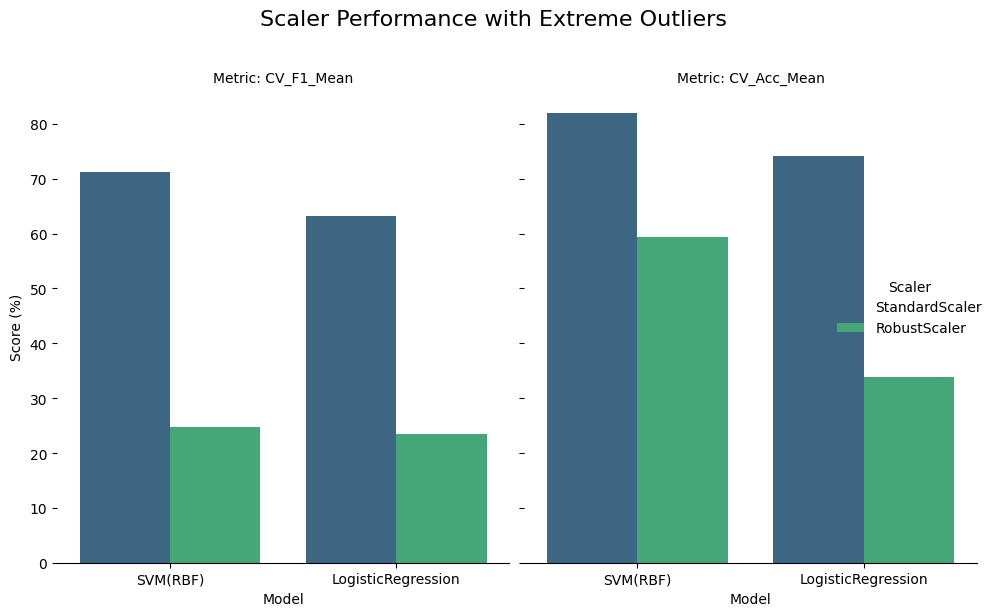

In [ ]:
# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

results_df_melted = results_df_sorted.melt(id_vars=['Scaler', 'Model'], var_name='Metric', value_name='Score')

# Use catplot to create separate plots for each metric
g = sns.catplot(x='Model', y='Score', hue='Scaler', col='Metric', data=results_df_melted, kind='bar', palette='viridis', height=6, aspect=.7)
g.fig.suptitle('Scaler Performance with Extreme Outliers', y=1.02, fontsize=16)
g.set_axis_labels("Model", "Score (%)")
g.set_titles("Metric: {col_name}")
g.despine(left=True)
plt.tight_layout()
plt.show()